In [1]:
import pandas as pd
import numpy as np
import sklearn
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn import preprocessing
from sklearn import linear_model

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = r"C:\Users\AKHIL MADDUKURI\Desktop\ML goalstreet\project dataset\Project-2.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
#check datatypes
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [6]:
#check number of unique values in each categorical feature
cat_features = df.select_dtypes(include=['object'])
for col in cat_features.columns:
        print(col,':',len(cat_features[col].unique())," ",cat_features[col].unique())
    

cut : 5   ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color : 7   ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity : 8   ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [7]:
#building interaction between categorical data
interactions_cut_color = df['cut'] + "_" + df['color']
interactions_color_clarity = df['color']+ "_"+df['clarity']
interactions_cut_clarity = df['cut'] + "_" +df['clarity']

print(interactions_cut_color.head())
print(interactions_color_clarity.head())
print(interactions_cut_clarity.head())

0      Ideal_E
1    Premium_E
2       Good_E
3    Premium_I
4       Good_J
dtype: object
0    E_SI2
1    E_SI1
2    E_VS1
3    I_VS2
4    J_SI2
dtype: object
0      Ideal_SI2
1    Premium_SI1
2       Good_VS1
3    Premium_VS2
4       Good_SI2
dtype: object


In [8]:

df= df.assign(cut_color=sklearn.preprocessing.LabelEncoder().fit_transform(interactions_cut_color))
df = df.assign(color_clarity=sklearn.preprocessing.LabelEncoder().fit_transform(interactions_color_clarity))
df = df.assign(cut_clarity=sklearn.preprocessing.LabelEncoder().fit_transform(interactions_cut_clarity))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_color,color_clarity,cut_clarity
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,15,11,19
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,22,10,26
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,8,12,12
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,26,45,29
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,13,51,11


In [9]:
#Encode the catergorical data
#In our dataset cut,color,clarity are all ordinal variables...we can easily encode them by replacing with numerical values
cut_dict = {'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
color_dict = {'D':7 ,'E':6,'F':5,'G':4, 'H':3, 'I':2 , 'J':1}
clarity_dict = {'I1':1,'SI2':2,'SI1':3,'VS2':4 , 'VS1':5,'VVS2':6 , 'VVS1':7 ,  'IF':8}

df['cut'] = df['cut'].map(cut_dict)
df['color'] = df['color'].map(color_dict)
df['clarity'] = df['clarity'].map(clarity_dict)

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_color,color_clarity,cut_clarity
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43,15,11,19
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31,22,10,26
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31,8,12,12
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63,26,45,29
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75,13,51,11


                  carat       cut     color   clarity     depth     table  \
carat          1.000000 -0.134967 -0.291437 -0.352841  0.028224  0.181618   
cut           -0.134967  1.000000  0.020519  0.189175 -0.218055 -0.433405   
color         -0.291437  0.020519  1.000000 -0.025631 -0.047279 -0.026465   
clarity       -0.352841  0.189175 -0.025631  1.000000 -0.067384 -0.160327   
depth          0.028224 -0.218055 -0.047279 -0.067384  1.000000 -0.295779   
table          0.181618 -0.433405 -0.026465 -0.160327 -0.295779  1.000000   
price          0.921591 -0.053491 -0.172511 -0.146800 -0.010647  0.127134   
x              0.975094 -0.125565 -0.270287 -0.371999 -0.025289  0.195344   
y              0.951722 -0.121462 -0.263584 -0.358420 -0.029341  0.183760   
z              0.953387 -0.149323 -0.268227 -0.366952  0.094924  0.150929   
cut_color      0.083723 -0.033512 -0.230398  0.005569 -0.178144  0.152372   
color_clarity  0.263097 -0.004983 -0.992016  0.095264  0.040371  0.015217   

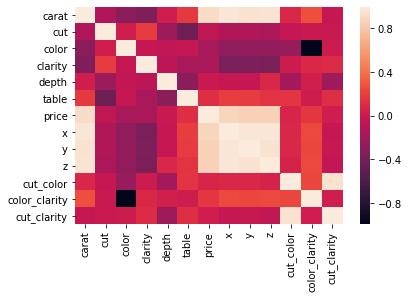

In [10]:
#Find correlation matrix and draw heatmap
corr = df.corr()
print(corr)
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

From the Correlation matrix we can observe that price depends mostly on carat,x,y,z features. 

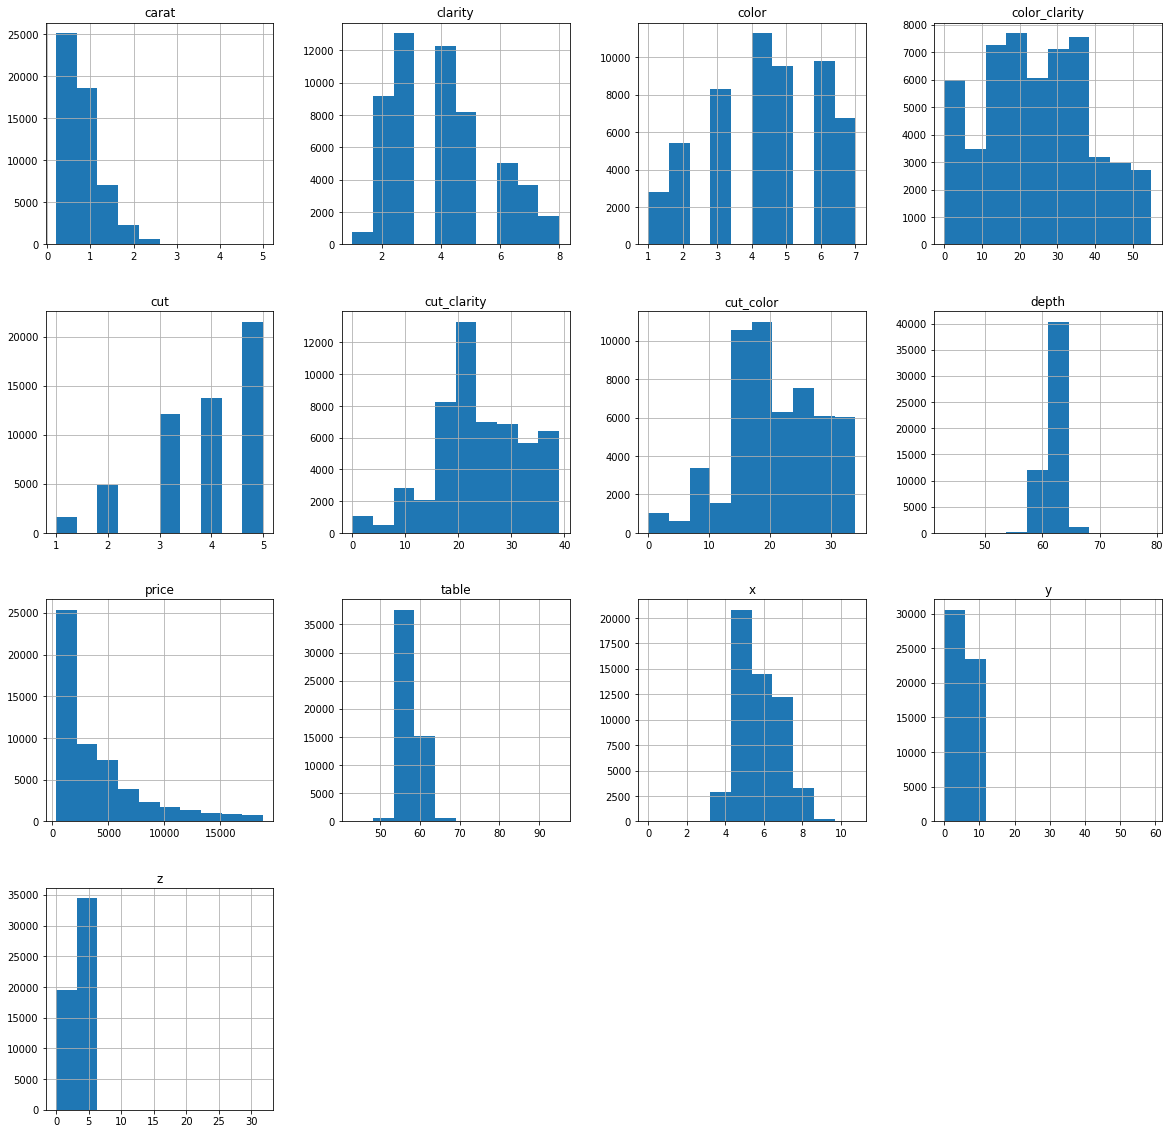

In [11]:
df.hist(figsize=(20,20))
plt.show()

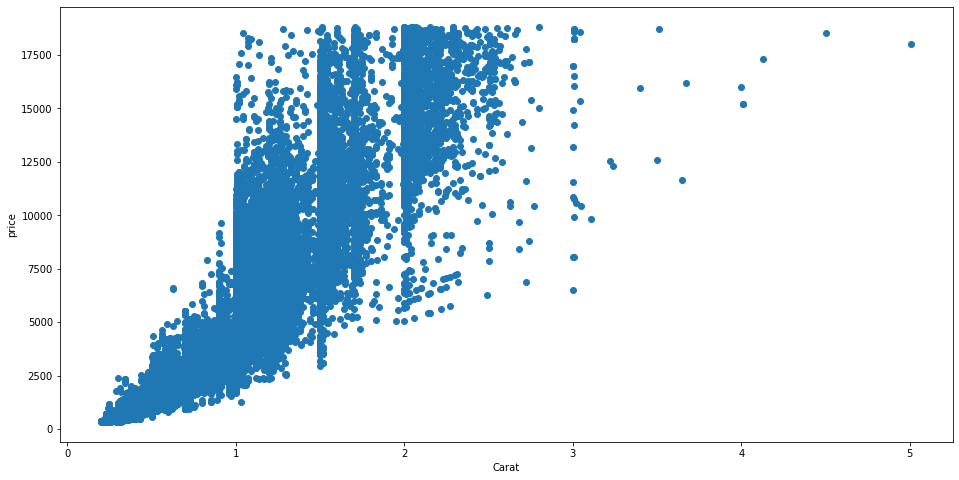

In [12]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['carat'],df['price'])
ax.set_xlabel('Carat')
ax.set_ylabel('price')
plt.show()

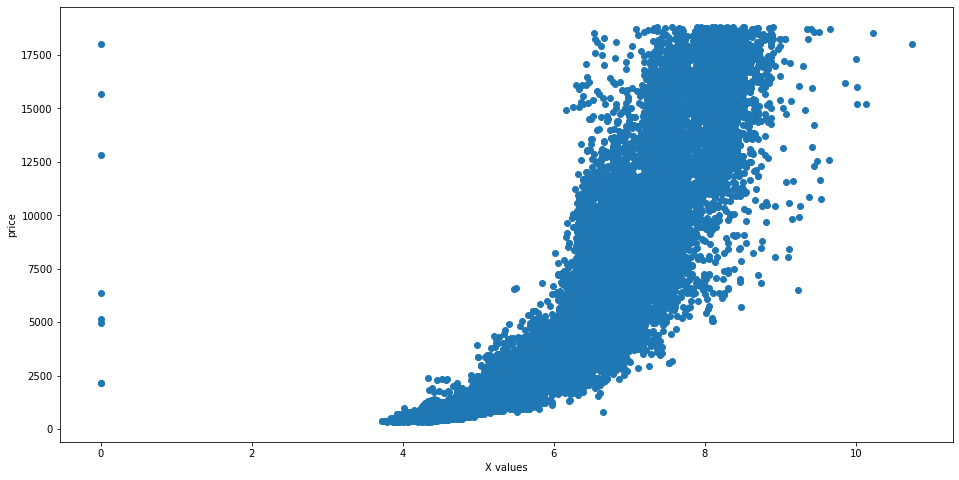

In [13]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['x'],df['price'])
ax.set_xlabel('X values')
ax.set_ylabel('price')
plt.show()

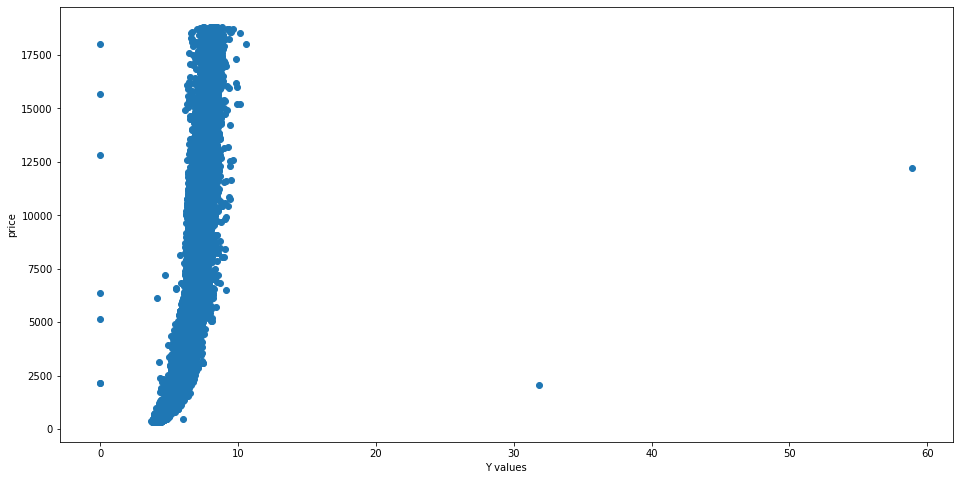

In [14]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['y'],df['price'])
ax.set_xlabel('Y values')
ax.set_ylabel('price')
plt.show()

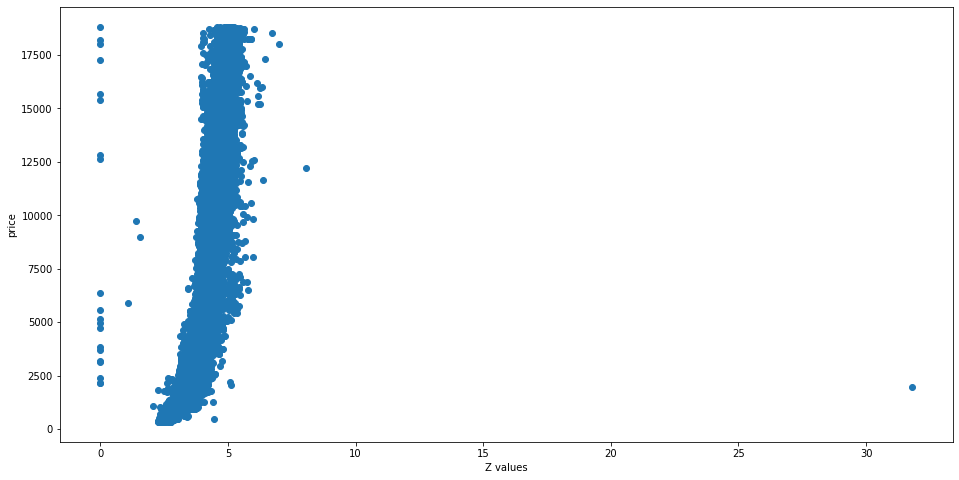

In [15]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['z'],df['price'])
ax.set_xlabel('Z values')
ax.set_ylabel('price')
plt.show()

In [16]:
#calculate price per carat
df['PricePerCarat'] = df['price'] / df['carat']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_color,color_clarity,cut_clarity,PricePerCarat
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43,15,11,19,1417.391304
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31,22,10,26,1552.380952
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31,8,12,12,1421.739130
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63,26,45,29,1151.724138
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75,13,51,11,1080.645161


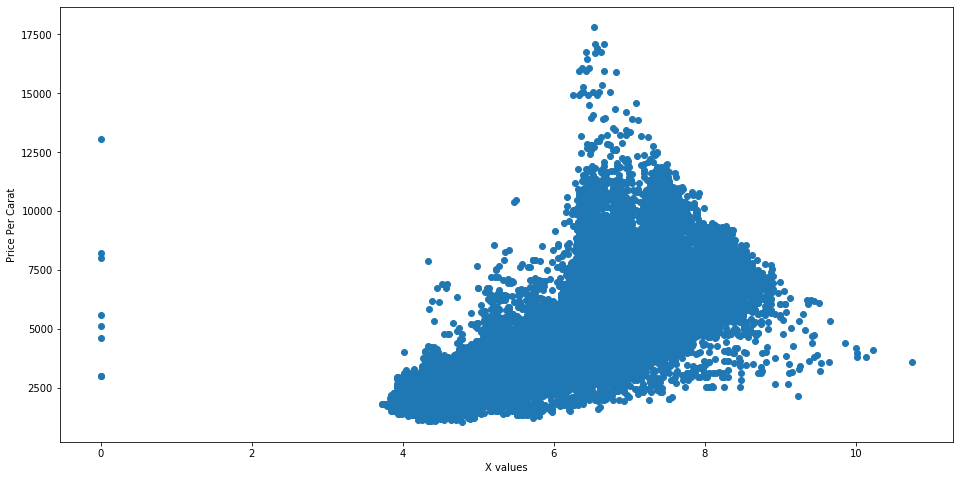

In [17]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['x'],df['PricePerCarat'])
ax.set_xlabel('X values')
ax.set_ylabel('Price Per Carat')
plt.show()

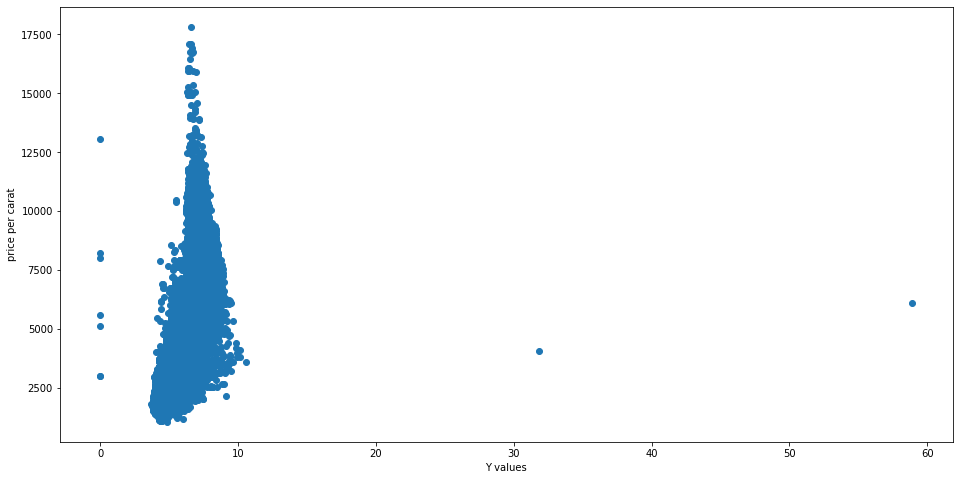

In [18]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['y'],df['PricePerCarat'])
ax.set_xlabel('Y values')
ax.set_ylabel('price per carat')
plt.show()

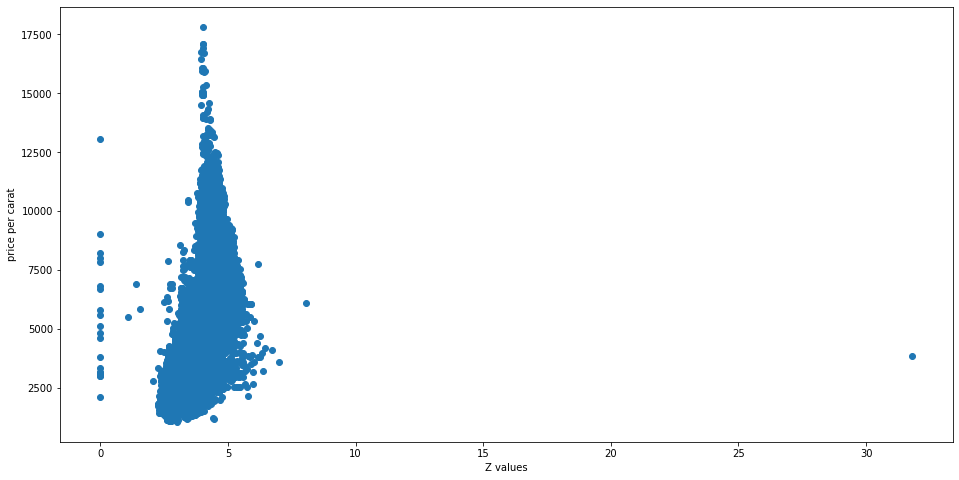

In [19]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['z'],df['PricePerCarat'])
ax.set_xlabel('Z values')
ax.set_ylabel('price per carat')
plt.show()

From the above scatterplots we can see identify the outliers present in the data. So, those outliers should be removed.

In [20]:
z = np.abs(stats.zscore(df))
print(z)

[[1.19816781 0.98147332 0.93716275 ... 0.99406105 0.62253249 1.28736106]
 [1.24036129 0.08588908 0.93716275 ... 1.06721441 0.20606247 1.22029036]
 [1.19816781 1.70527938 0.93716275 ... 0.9209077  1.45112744 1.28520081]
 ...
 [0.20662095 0.80969515 1.52502147 ... 1.65244124 1.15302813 0.03469231]
 [0.13092691 0.08588908 0.8264134  ... 0.76161946 0.32443317 0.39876879]
 [0.10113725 0.98147332 1.52502147 ... 1.57928789 0.62253249 0.16515305]]


In [21]:
df_o = df[(z < 3).all(axis=1)]
print(df.shape)
print(df_o.shape)
df_o.head()

(53940, 14)
(51232, 14)


,carat,cut,color,clarity,depth,table,price,x,y,z,cut_color,color_clarity,cut_clarity,PricePerCarat
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43,15,11,19,1417.391304
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31,22,10,26,1552.380952
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63,26,45,29,1151.724138
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75,13,51,11,1080.645161
5,0.24,3,1,6,62.8,57.0,336,3.94,3.96,2.48,34,55,39,1400.000000


In [22]:
#Separate price coloumn from rest of the data
y = df_o.price
y = y.astype(float)
print(y.head())
x = df_o.drop('price',axis=1)
print(x.head())

0    326.0
1    326.0
3    334.0
4    335.0
5    336.0
Name: price, dtype: float64
   carat  cut  color  clarity  depth  table     x     y     z  cut_color  \
0   0.23    5      6        2   61.5   55.0  3.95  3.98  2.43         15   
1   0.21    4      6        3   59.8   61.0  3.89  3.84  2.31         22   
3   0.29    4      2        4   62.4   58.0  4.20  4.23  2.63         26   
4   0.31    2      1        2   63.3   58.0  4.34  4.35  2.75         13   
5   0.24    3      1        6   62.8   57.0  3.94  3.96  2.48         34   

   color_clarity  cut_clarity  PricePerCarat  
0             11           19    1417.391304  
1             10           26    1552.380952  
3             45           29    1151.724138  
4             51           11    1080.645161  
5             55           39    1400.000000  


In [23]:
#Normalise the x dataset
scaler = preprocessing.MinMaxScaler()
normalised_x = scaler.fit_transform(x)
print(normalised_x)

[[0.01492537 1.         0.83333333 ... 0.2        0.48717949 0.04071445]
 [0.00497512 0.75       0.83333333 ... 0.18181818 0.66666667 0.05572156]
 [0.04477612 0.75       0.16666667 ... 0.81818182 0.74358974 0.01117963]
 ...
 [0.24875622 0.5        1.         ... 0.03636364 0.87179487 0.32099976]
 [0.32835821 0.75       0.33333333 ... 0.63636364 0.69230769 0.23953745]
 [0.27363184 1.         1.         ... 0.05454545 0.48717949 0.2918091 ]]


In [24]:
#Standardise the x dataset
scaler = preprocessing.StandardScaler()
standardised_x = scaler.fit_transform(x)
print(standardised_x)

[[-1.24074255  0.97996028  0.93042133 ... -0.98761867 -0.6857437
  -1.35405574]
 [-1.28782657  0.04642876  0.93042133 ... -1.06095587  0.17532319
  -1.27883929]
 [-1.09949046  0.04642876 -1.43025396 ...  1.50584606  0.54435186
  -1.50208592]
 ...
 [-0.13426788 -0.88710276  1.52059015 ... -1.64765345  1.15939964
   0.05074992]
 [ 0.24240435  0.04642876 -0.84008514 ...  0.77247408  0.29833275
  -0.35754374]
 [-0.0165578   0.97996028  1.52059015 ... -1.57431625 -0.6857437
  -0.09555531]]


In [25]:
#Multiple linear regression
lin_reg = sklearn.linear_model.LinearRegression()
MSEs = sklearn.model_selection.cross_val_score(lin_reg,standardised_x,y,scoring='neg_mean_squared_error',cv=10)
for i in range(10):
    MSEs[i] = math.sqrt(-MSEs[i])
print(MSEs)
mean_MSE = np.mean(MSEs)
print(mean_MSE)

[ 305.27971702  362.35265515  414.15964201  459.7039969  1570.5068651
  353.90674256  424.63769592  400.74014074  276.98885843  297.94284239]
486.62191562157716


In [37]:
#Ridge Regression
ridge = sklearn.linear_model.Ridge()
param = {'alpha':[1e-30,1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
ridge_regressor = sklearn.model_selection.GridSearchCV(ridge,param,scoring='neg_mean_squared_error',cv=10)
ridge_regressor.fit(standardised_x,y)
print(ridge_regressor.best_params_)


{'alpha': 1e-30}


In [40]:
ridge_score = []
coef = []
for _ in range(10):
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(standardised_x, y, test_size=0.20)
    ridge = sklearn.linear_model.Ridge(alpha=1e-30)
    ridge_result = ridge.fit(X_train, y_train)
    pred=ridge_result.predict(X_test)
    mse = sklearn.metrics.mean_squared_error(y_test, pred)
    rmse = math.sqrt(mse)

    ridge_score.append(rmse)
    coef = ridge_result.coef_
    
mean_score = np.mean(score)
print(coef)
print(ridge_score)
print(mean_score)

[ 4764.39145699   -19.65099763  3603.32876683  -249.1781963
   -81.64919294   -60.35680509 -2392.84428901  -110.88184022
 -1045.2936242   1978.49917683  3299.27369737 -1961.90763659
  2161.23873579]
[400.9569674835045, 394.19518867503973, 393.70779905829454, 397.437643846088, 402.60376542194496, 395.9296476827857, 391.20395818781066, 426.586977211242, 408.5228755502198, 398.47887933992723]
399.0744689221651


In [41]:
#lasso Regression
lasso = sklearn.linear_model.Lasso()
param = {'alpha':[1e-30,1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
lasso_regressor = sklearn.model_selection.GridSearchCV(lasso,param,scoring='neg_mean_squared_error',cv=10)
lasso_regressor.fit(standardised_x,y)
print(lasso_regressor.best_params_)

{'alpha': 1e-15}


In [53]:
ridge_score = []
lasso_score = []

for _ in range(10):
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(standardised_x, y, test_size=0.20)
    ridge = sklearn.linear_model.Ridge(alpha=1e-30)
    ridge_result = ridge.fit(X_train, y_train)
    pred=ridge_result.predict(X_test)
    mse = sklearn.metrics.mean_squared_error(y_test, pred)
    rmse = math.sqrt(mse)

    ridge_score.append(rmse)
    
    lasso = sklearn.linear_model.Lasso(alpha=1e-15)
    lasso_result = lasso.fit(X_train, y_train)
    pred=lasso_result.predict(X_test)
    mse = sklearn.metrics.mean_squared_error(y_test, pred)

    rmse = math.sqrt(mse)
    lasso_score.append(rmse)
print("FOR RIDGE REGRESSION:")
mean_score = np.mean(ridge_score)
print(ridge_result.coef_)
print(ridge_score)
print(mean_score)

print("FOR LAASSO REGRESSION:")
mean_score = np.mean(lasso_score)
print(lasso_result.coef_)
print(lasso_score)
print(mean_score)

FOR RIDGE REGRESSION:
[ 4.78857913e+03 -2.07279875e+01  1.71116557e+03 -2.47418571e+02
 -3.74693689e+00 -5.96932487e+01 -2.11026213e+03  2.95319882e+02
 -1.75836224e+03  9.84762282e+02  1.63148461e+03 -9.75610369e+02
  2.16151437e+03]
[396.9888277837658, 397.16925422461173, 404.8402689911938, 396.41625758840945, 400.14666781998045, 398.60961333489024, 400.41151738679196, 413.13039317263537, 388.044517147737, 402.57307097766494]
399.8330388427681
FOR LAASSO REGRESSION:
[ 4797.00797841   -22.88074132   682.59101285  -249.84401969
   -86.83009382   -62.46398046 -2345.17974412  -188.85243467
 -1051.05594785   445.44786885   727.16102027  -438.40165681
  2167.11266183]
[393.1823966940194, 391.5422573593736, 405.3037203745129, 397.0663480534305, 400.4711345451089, 399.2525288454062, 396.9089159019231, 413.58906014576917, 388.490088701527, 397.4483394802314]
398.32547901013015


In [49]:
#Performing T-test between ridge and lasso models built above
#we use student's t-test for independent samples to find whether there is significant difference between both models
from scipy.stats import ttest_ind

# compare scores from two models
stat, p = ttest_ind(ridge_score, lasso_score)
print('t=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > 0.05:
    print("There's no significant difference between two models") #because the null hypothesis that their means are equal comes true
else:
    print("These models differ significantly")

t=0.556, p=0.585
There's no significant difference in two models


In [50]:
#Elastic Net Regression
elastic=sklearn.linear_model.ElasticNet()
search=sklearn.model_selection.GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
search.fit(standardised_x,y)
print(search.best_params_)

{'alpha': 1e-05, 'l1_ratio': 0.8}


In [52]:
score = []
for _ in range(10):
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(standardised_x, y, test_size=0.20)
    elastic = sklearn.linear_model.ElasticNet(alpha=1e-05,l1_ratio=0.8)
    elastic_result = elastic.fit(X_train, y_train)
    pred=elastic_result.predict(X_test)
    mse = sklearn.metrics.mean_squared_error(y_test, pred)

    rmse = math.sqrt(mse)
    score.append(rmse)
mean_score = np.mean(score)
print(elastic_result.coef_)
print(score)
print(mean_score)

[ 4782.76356648   -22.18552469   679.050932    -251.50596381
  -114.17522488   -61.34714743 -2439.14823519  -331.86038193
  -800.44342705   443.60621837   724.24232394  -436.71239056
  2165.01699911]
[389.3995807886878, 397.6951773665978, 398.4914404307439, 390.0638906215843, 394.1323677171396, 388.21407995570985, 397.7243643093813, 393.57138851063456, 394.3772225739094, 399.9475325749253]
394.3617044849314


The project is pretty much done till here. In the next cell we are going to visualise the results of both ridge and lasso models for different alpha values

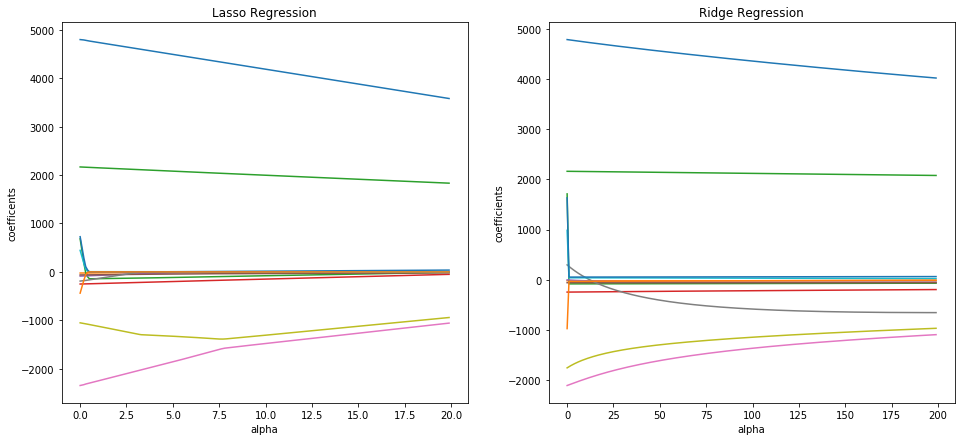

In [55]:
coefsLasso = []
coefsRidge = []
# Build Ridge and Lasso for 200 values of alpha and write the coefficients into array
alphasLasso = np.arange (0, 20, 0.1)
alphasRidge = np.arange (0, 200, 1)
for i in range(200):
    lasso = sklearn.linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_)
    ridge = sklearn.linear_model.Ridge(alpha=alphasRidge[i])
    ridge.fit(X_train, y_train)
    coefsRidge.append(ridge.coef_)

# Build Lasso and Ridge coefficient plots
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso Regression')
plt.xlabel('alpha')
plt.ylabel('coefficents')

plt.subplot(122)
plt.plot(alphasRidge, coefsRidge)
plt.title('Ridge Regression')
plt.xlabel('alpha')
plt.ylabel('coefficients')

plt.show()